## ディープラーニング基礎

### 準備

In [1]:
# import module
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

/Users/takuto/.pyenv/versions/anaconda3-5.1.0/envs/py3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# print shape
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# reshape
# 60000行, 784列(文字情報ベクトル)に変換する
# 訓練データ; 6000, テストデータ: 1000とする
X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

### モデル

In [4]:
# モデルインスタンスを作成する
model = Sequential()
# 入力ユニット数は784, 1つ目の全結合層の出力ユニット数は256
model.add(Dense(256, input_dim=784))
# 活性化関数(sigmoid)
model.add(Activation("sigmoid"))
# 入力ユニット数は256, 2つ目の全結合層の出力ユニット数は128
model.add(Dense(128))
model.add(Activation("relu"))
# 3つ目の全結合層（出力層）の出力ユニット数は10
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", 
              metrics=["accuracy"])

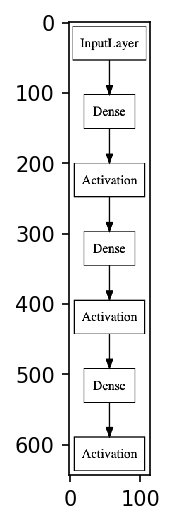

In [5]:
# モデル構造の出力
plot_model(model, "../image/model125.png", show_layer_names=False)
# モデル構造の可視化
image = plt.imread("../image/model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()